<a href="https://colab.research.google.com/github/diegour1/Estructuras/blob/master/Taller_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neuronales tarea**

> Nicolas Barrera Boada, nibarrerabo@unal.edu.co

> Diego Useche Reyes, diusecher@unal.edu.co

> Kevin  Pulido, kapulidor@unal.edu.co

> Grupo: 12



# Librerias Usadas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from matplotlib import patches as patches
from mpl_toolkits.mplot3d import Axes3D

#Problema 1 (a)

El perceptron propuesto para la clasificacion de (A and notB), tiene dos entradas A y B y una salida, esto es suficiente con una sola neurona w y una bias b, y una funcion de clasificacion del perceptron usual. Puesto que eso genera la separacion lineal en el espacio

$$
W^T = 
\left[\begin{array}{cc} 1&&-1 \end{array}\right]
$$

$$
b = -\frac{1}{2}
$$

$$
f(x) = 
     \begin{cases}
       \text{1} &\quad\text{if   } \quad w^Tx+b\ge0\\
       \text{0} &\quad\text{if   } \quad w^Tx+b<0 \\
      \end{cases}
$$

In [0]:
## Creacion de la funcion booleana

tabla_AnotB = {'A': [0,0,1,1],
               'B': [0,1,0,1],
              '-B': [1,0,1,0],
               'Y': [0,0,1,0]}
tablaAnotB = pd.DataFrame(tabla_AnotB
tablaAnotB

,A,B,-B,Y
0,0,0,1,0
1,0,1,0,0
2,1,0,1,1
3,1,1,0,0


In [0]:
## Perceptron propuesto
W = np.array([1,-1])
b = -0.5
print('Perceptron propuesto')
W, b

Perceptron propuesto


(array([ 1, -1]), -0.5)

In [0]:
# Funcion de clasicacion

def predict(x):
  Y_prediction = np.zeros((4))
  for i in range(Y_prediction.shape[0]):
    if (x[i]) >= 0:
      Y_prediction[i] = 1
    else:
      Y_prediction[i] = 0
  return Y_prediction

In [0]:
## Calcular el resultado final

AB = tablaAnotB[['A','B']].copy()
Y_f = predict(np.dot(AB,W) + b)
AB['A^-B'] = Y_f.tolist() 
print('El valor de la prediccion del perceptron propuesto es:')
AB


El valor de la prediccion del perceptron propuesto es:


,A,B,A^-B
0,0,0,0.0
1,0,1,0.0
2,1,0,1.0
3,1,1,0.0


# Problema 1(b)

El perceptron propuesto para la clasificacion de (A xor B, tiene dos entradas A y B y una salida, para esto necesitamos una red de perceptrones, puesto que las entradas no son linealmente separables.

La primera capa esta compuesta por dos neuronas que separan los datos en datos linealmente separables, y la segunda capa una neurona que clasifica los datos que ya estan linealmente separables. La funcion de activacion y clasificacion son las usuales del perceptron. 

Primera capa:

$$
W_1 = \left[\begin{array}{cc} w_{11}^T \\ w_{12}^T\end{array}\right] = 
\left[\begin{array}{cc} 1&&-1 \\ 1&&-1 \end{array}\right]
$$

$$
b_1 = \left[\begin{array}{cc} 0.5 \\ -0.5\end{array}\right]
$$

Segunda capa:

$$
W_2 = 
\left[\begin{array}{cc} 1&&-1 \end{array}\right]
$$

$$
b_2 = -0.5
$$

Funcion de activacion y de prediccion varian en el 1 y el 0:

$$
act(x) = 
     \begin{cases}
       \text{1} &\quad\text{if   } \quad w^Tx+b\ge0\\
       \text{0} &\quad\text{if   } \quad w^Tx+b<0 \\
      \end{cases}
$$

$$
pred(x) = 
     \begin{cases}
       \text{0} &\quad\text{if   } \quad w^Tx+b\ge0\\
       \text{1} &\quad\text{if   } \quad w^Tx+b<0 \\
      \end{cases}
$$

In [0]:
## Creacion de la funcion booleana XOR

tabla_AnotXOR = {'A': [0,0,1,1],
               'B': [0,1,0,1],
               'AxorB': [0,1,1,0]}
tablaAnotXOR = pd.DataFrame(tabla_AnotXOR)
tablaAnotXOR

,A,B,AxorB
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [0]:
## Perceptron propuesto

# Primera capa
W1 = np.array([[1, -1],[1, -1]])
b1 = np.array([[0.5], [-0.5]])

# Segunda capa
W2 = np.array([1,-1])
b2 = -0.5

print('Perceptron propuesto')
print('--------------------')
print('Primera capa W1 y b1')
print(W1, b1)
print('Segunda capa W2 y b2')
print(W2, b2)

Perceptron propuesto
--------------------
Primera capa W1 y b1
[[ 1 -1]
 [ 1 -1]] [[ 0.5]
 [-0.5]]
Segunda capa W2 y b2
[ 1 -1] -0.5


In [0]:
# Funcion de activacion y prediccion varian ligeramente en el 0 y el 1 

def activation(x):
  Y_activation = np.zeros((4,2))
  for i in range(2):
    for j in range(Y_activation.shape[0]):
      if (x[j,i]) >= 0:
        Y_activation[j,i] = 1
      else:
        Y_activation[j,i] = 0
  return Y_activation

def predict(x):
  Y_prediction = np.zeros((4))
  for i in range(Y_prediction.shape[0]):
    if (x[i]) >= 0:
      Y_prediction[i] = 0
    else:
      Y_prediction[i] = 1
  return Y_prediction

In [0]:
## Calcular el resultado final

AxorB = tablaAnotXOR[['A','B']].copy()
Yf = predict(np.dot(activation((np.dot(W1, AxorB.T) + b1).T), W2)+b2)
AxorB['AxorB'] = Yf.tolist() 
print('El valor de la prediccion del perceptron propuesto es:')
AxorB

El valor de la prediccion del perceptron propuesto es:


,A,B,AxorB
0,0,0,0.0
1,0,1,1.0
2,1,0,1.0
3,1,1,0.0


# Problema 2

Para derivar la regla de entrenamiento, se usa gradiente descendiente para disminuir el error $E(w)$, que mide la diferencia entre la salida esperada y la del modelo, la cual depende de los parametros $w$, y de esa forma actualizar los valores de $w$ por medio de:

$$
w_i \leftarrow w_i +\Delta w_i 
$$
Donde
$$
\Delta w_i = - \eta \frac{\partial E}{\partial w_i}
$$
Y
$$
E(w)=\frac{1}{2} \sum_{p \in P} (d_p-y_p)^2
$$
$P$ es el conjunto de datos de entrenamiento, $d$ es la salida esperada y $y$ es la salida del modelo.

En este caso el modelo esta dado por:
\begin{equation}
 y=w_0 + w_1x_1+w_1x_1^2+....+w_nx_n+w_nx_n^2 \\
 y=w_0+\sum_{i=1}^n w_i(x_i+x_i^2)
 \end{equation}

Derivando la regla de aprendizaje para este modelo:
\begin{equation}
\frac{\partial E}{\partial w_i} = \frac{\partial }{\partial w_i}\frac{1}{2} \sum_{p \in P} (d_p-y_p)^2 \\
= \frac{1}{2} \sum_{p \in P} \frac{\partial }{\partial w_i}(d_p-y_p)^2 \\
= \frac{1}{2} \sum_{p \in P} 2(d_p-y_p)\frac{\partial }{\partial w_i} (d_p-y_p) \\
= \sum_{p \in P} (d_p-y_p)\frac{\partial }{\partial w_i} (d_p-y_p) \\
=- \sum_{p \in P} (d_p-y_p)(x_i+x_i^2)
\end{equation}

Por tal la actualizacion de los pesos en este modelo va a estar dado por:

Para $i \neq 0$
$$
w_i \leftarrow w_i +\eta \sum_{p \in P} (d_p-y_p)(x_i+x_i^2)
$$

Para $i = 0$
$$
w_0 \leftarrow w_0 +\eta \sum_{p \in P} (d_p-y_p)
$$

# Problema 3


En el aprendizaje con momentum, se tiene que la actualizacion de los pesos va a estar dada por 
$$
w(i) \leftarrow w(i) +\Delta w(i) 
$$
Donde
$$
\Delta w(i) = - \eta \frac{\partial E}{\partial w_i}+\alpha\Delta w(i-1)
$$
El termino $\alpha $ se le conoce como momentum, este parametro al igual que el parametro de aprendizaje $\eta$, permiten por medio de su ajuste tener una mejor convergencia  al error minimo.

En el problema se tienen un perceptron de dos capas, con dos entradas a y b, una neurona oculta c, y una neurona de salida d. Esta red tiene 5 pesos $(w_{ca} , w_{cb},w_{c0},w_{dc}, w_{d0})$. A partir de los pesos inicializados en (1,1,1,1,1) y los paramentros $\eta=0.3$ y $\alpha=0.9$, se desea calcular las dos primera iteraciones del algoritmo de retropropagacion a partir de los datos de entrenamineto {(1,0,1),(0,1,0)}


In [0]:
#Se construye la red a usar

import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Salida de la capa oculta

def output_hidden(a, b, w_ca, w_cb, w_c0):
    return  sigmoid (w_ca*a+w_cb*b+w_c0*1)

# Salida de la red
def output_network(output_h, w_cd, w_d0):
     return sigmoid(w_cd*output_h+w_d0*1)

#Error en la capa de salida

def delta_y(output_y, target):
    return output_y*(1-output_y)*(target-output_y)

#Error en la capa oculta

def delta_h(output_h, delta_output, w_cd):
    return output_h*(1-output_h)*w_cd*delta_output

#Actualizacion de los pesos

#Cambio en peso wcd

def delta_wcd(delta_output, past_delta_wcd, eta, alpha, output_h):
    return eta*delta_output*output_h + alpha*past_delta_wcd

#Cambio en peso wd0

def delta_wd0(delta_output, past_delta_wd0, eta, alpha):
    return eta*delta_output + alpha*past_delta_wd0

#Cambio en peso wca

def delta_wca(delta_hidden, past_delta_wca, eta, alpha, a):
    return eta*delta_hidden*a + alpha*past_delta_wca

#Cambio en peso wcb

def delta_wcb(delta_hidden, past_delta_wcb, eta, alpha, b):
    return eta*delta_hidden*b + alpha*past_delta_wcb

#Cambio en peso wc0

def delta_wc0(delta_hidden, past_delta_w0, eta, alpha):
    return eta*delta_hidden + alpha*past_delta_wc0
    

##Iteracion 1



###Para el dato de entrenamiento (1, 0, 1)



1 Propagar la entrada en la red

In [0]:
a=1
b=0
target=1
w_ca = w_cb = w_c0 = w_cd = w_d0 =1
past_delta_wcd = past_delta_wd0 = past_delta_wca = past_delta_wcb= past_delta_wc0=0
eta= 0.3
alpha=0.9

output_h=output_hidden(a, b, w_ca, w_cb, w_c0)
output_y=output_network(output_h, w_cd, w_d0)

2 Se calculan los errores por retroporpagacion

* Para la capa de salida



In [0]:
delta_output=delta_y(output_y, target)

* Para la capa oculta

In [0]:
delta_hidden=delta_h(output_h, delta_output, w_cd)

3 Se calculan los cambios en los pesos


In [0]:
past_delta_wcd=delta_wcd(delta_output, past_delta_wcd, eta, alpha, output_h)
past_delta_wd0=delta_wd0(delta_output, past_delta_wd0, eta, alpha)
past_delta_wca=delta_wca(delta_hidden, past_delta_wca, eta, alpha, a)
past_delta_wcb=delta_wcb(delta_hidden, past_delta_wcb, eta, alpha, b)
past_delta_wc0=delta_wc0(delta_hidden, past_delta_wc0, eta, alpha)

4 Se actualizan los pesos

In [0]:
w_ca = w_ca + past_delta_wca
w_cb = w_cb + past_delta_wcb
w_c0 = w_c0 + past_delta_wc0
w_cd = w_cd + past_delta_wcd
w_d0 = w_d0 + past_delta_wd0

Mostrando los nuevos valores de estos pesos se tiene:

In [0]:
print("(",w_ca,",",w_cb,",",w_c0,",",w_cd,",",w_d0,")")

( 1.0004783625949738 , 1.0 , 1.0004783625949738 , 1.004013010644865 , 1.0045561125771194 )


###  Para el dato de entrenamiento (0, 1, 0)

Se repite el proceso

In [0]:
a=0
b=1
target=0

output_h=output_hidden(a, b, w_ca, w_cb, w_c0)
output_y=output_network(output_h, w_cd, w_d0)

delta_output=delta_y(output_y, target)
delta_hidden=delta_h(output_h, delta_output, w_cd)

past_delta_wcd=delta_wcd(delta_output, past_delta_wcd, eta, alpha, output_h)
past_delta_wd0=delta_wd0(delta_output, past_delta_wd0, eta, alpha)
past_delta_wca=delta_wca(delta_hidden, past_delta_wca, eta, alpha, a)
past_delta_wcb=delta_wcb(delta_hidden, past_delta_wcb, eta, alpha, b)
past_delta_wc0=delta_wc0(delta_hidden, past_delta_wc0, eta, alpha)

w_ca = w_ca + past_delta_wca
w_cb = w_cb + past_delta_wcb
w_c0 = w_c0 + past_delta_wc0
w_cd = w_cd + past_delta_wcd
w_d0 = w_d0 + past_delta_wd0

print("(",w_ca,",",w_cb,",",w_c0,",",w_cd,",",w_d0,")")

( 1.0009088889304503 , 0.9968665643653356 , 0.9977754532957859 , 0.9814321855823411 , 0.9789210004408649 )


## Iteracion 2



###  Para el dato de entrenamiento (1, 0, 1)

In [0]:
a=1
b=0
target=1

output_h=output_hidden(a, b, w_ca, w_cb, w_c0)
output_y=output_network(output_h, w_cd, w_d0)

delta_output=delta_y(output_y, target)
delta_hidden=delta_h(output_h, delta_output, w_cd)

past_delta_wcd=delta_wcd(delta_output, past_delta_wcd, eta, alpha, output_h)
past_delta_wd0=delta_wd0(delta_output, past_delta_wd0, eta, alpha)
past_delta_wca=delta_wca(delta_hidden, past_delta_wca, eta, alpha, a)
past_delta_wcb=delta_wcb(delta_hidden, past_delta_wcb, eta, alpha, b)
past_delta_wc0=delta_wc0(delta_hidden, past_delta_wc0, eta, alpha)

w_ca = w_ca + past_delta_wca
w_cb = w_cb + past_delta_wcb
w_c0 = w_c0 + past_delta_wc0
w_cd = w_cd + past_delta_wcd
w_d0 = w_d0 + past_delta_wd0

print("(",w_ca,",",w_cb,",",w_c0,",",w_cd,",",w_d0,")")

( 1.0017953648443423 , 0.9940464722941377 , 0.99584183713848 , 0.9653698593505435 , 0.9606871595800054 )


###  Para el dato de entrenamiento (0, 1, 0)

In [0]:
a=0
b=1
target=0

output_h=output_hidden(a, b, w_ca, w_cb, w_c0)
output_y=output_network(output_h, w_cd, w_d0)

delta_output=delta_y(output_y, target)
delta_hidden=delta_h(output_h, delta_output, w_cd)

past_delta_wcd=delta_wcd(delta_output, past_delta_wcd, eta, alpha, output_h)
past_delta_wd0=delta_wd0(delta_output, past_delta_wd0, eta, alpha)
past_delta_wca=delta_wca(delta_hidden, past_delta_wca, eta, alpha, a)
past_delta_wcb=delta_wcb(delta_hidden, past_delta_wcb, eta, alpha, b)
past_delta_wc0=delta_wc0(delta_hidden, past_delta_wc0, eta, alpha)

w_ca = w_ca + past_delta_wca
w_cb = w_cb + past_delta_wcb
w_c0 = w_c0 + past_delta_wc0
w_cd = w_cd + past_delta_wcd
w_d0 = w_d0 + past_delta_wd0

print("(",w_ca,",",w_cb,",",w_c0,",",w_cd,",",w_d0,")")

( 1.002593193166845 , 0.9883257711376761 , 0.9909189643045211 , 0.9235019201053901 , 0.91311736473098 )


# Problema 4 

Al igual que en el problema 3) se desea mostrar el paso a paso del algoritmo de retropropagacion. A partir de la imagen y la descripcion del problema se tiene a $x_0$ como el bias, los pesos iniciales $(w_{30}=1.5, w_{31}=1, w_{32}=1, w_{40}=1, w_{42}=1, w_{43}=-2)$ y los datos de entrenamiento $\{ (1,0,1),(1,1,0) \}$

In [0]:
#Se construye la red a usar

import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Salida de la capa oculta

def output_hidden(x1, x2, w_30, w_31, w_32):
    return  sigmoid (w_31*x1+w_32*x2+w_30*1)

# Salida de la red
def output_network(output_x3, x2, w_40, w_42, w_43):
     return sigmoid(w_43*output_x3+w_42*x2+w_40*1)

#Error en la capa de salida

def delta_y(output_x4, target):
    return output_x4*(1-output_x4)*(target-output_x4)

#Error en la capa oculta

def delta_h(output_x3, delta_x4, w_43):
    return output_x3*(1-output_x3)*w_43*delta_x4

#Actualizacion de los pesos

#Cambio en peso w_30

def delta_w_30(delta_x3, eta):
    return eta*delta_x3

#Cambio en peso w_31

def delta_w_31(delta_x3, eta, x1):
    return eta*delta_x3*x1

#Cambio en peso w_32

def delta_w_32(delta_x3, eta, x2):
    return eta*delta_x3*x2

#Cambio en peso w_40

def delta_w_40(delta_x4, eta):
    return eta*delta_x4

#Cambio en peso w_42

def delta_w_42(delta_x4, eta, x2):
    return eta*delta_x4*x2

#Cambio en peso w_43

def delta_w_43(delta_x4, eta, output_x3):
    return eta*delta_x4*output_x3


## Para el dato de entrenamiento (1, 0, 1)

In [0]:
x1=1
x2=0
target=1
eta=0.1
w_30=1.5
w_31=1
w_32=1
w_40=1
w_42=1
w_43=-2

output_x3=output_hidden(x1, x2, w_30, w_31, w_32)
output_x4=output_network(output_x3, x2, w_40, w_42, w_43)

delta_x4=delta_y(output_x4, target)
delta_x3=delta_h(output_x3, delta_x4, w_43)

w_30 = w_30 + delta_w_30(delta_x3, eta)
w_31 = w_31 + delta_w_31(delta_x3, eta, x1)
w_32 = w_32 + delta_w_32(delta_x3, eta, x2)
w_40 = w_40 + delta_w_40(delta_x4, eta)
w_42 = w_42 + delta_w_42(delta_x4, eta, x2)
w_43 = w_43 + delta_w_43(delta_x4, eta, output_x3)

output_x3=output_hidden(x1, x2, w_30, w_31, w_32)
output_x4=output_network(output_x3, x2, w_40, w_42, w_43)

print("Propagacion hacia adelante \n")
print("La salida de la neurona oculta es", output_x3)
print("La salida de la neurona de salida es", output_x4)
print("\nAjuste de pesos por retropropagacion del error")
print("\nEl error en la capa de salida es", delta_x4)
print("Los ajustes de pesos", "w_43=",w_43, "w_42=",w_42, "w_40=",w_40)
print("\nEl error en la capa oculta es", delta_x3)
print("Los ajustes de pesos", "w_32=",w_32, "w_31=",w_31, "w_30=",w_30)
print("\nLa salida de la red acualizada es", output_x4)

Propagacion hacia adelante 

La salida de la neurona oculta es 0.9238523685212714
La salida de la neurona de salida es 0.30566665932739706

Ajuste de pesos por retropropagacion del error

El error en la capa de salida es 0.14698546476748486
Los ajustes de pesos w_43= -1.9864164585079354 w_42= 1.0 w_40= 1.0146985464767484

El error en la capa oculta es -0.020608454716621455
Los ajustes de pesos w_32= 1.0 w_31= 0.9979391545283378 w_30= 1.4979391545283378

La salida de la red acualizada es 0.30566665932739706


## Para el dato de entrenamiento (1, 1, 0)

In [0]:
x1=1
x2=1
target=0
eta=0.1

#Se dejan los pesos hallados en el primer patron de entrenamiento

output_x3=output_hidden(x1, x2, w_30, w_31, w_32)
output_x4=output_network(output_x3, x2, w_40, w_42, w_43)

delta_x4=delta_y(output_x4, target)
delta_x3=delta_h(output_x3, delta_x4, w_43)

w_30 = w_30 + delta_w_30(delta_x3, eta)
w_31 = w_31 + delta_w_31(delta_x3, eta, x1)
w_32 = w_32 + delta_w_32(delta_x3, eta, x2)
w_40 = w_40 + delta_w_40(delta_x4, eta)
w_42 = w_42 + delta_w_42(delta_x4, eta, x2)
w_43 = w_43 + delta_w_43(delta_x4, eta, output_x3)

output_x3=output_hidden(x1, x2, w_30, w_31, w_32)
output_x4=output_network(output_x3, x2, w_40, w_42, w_43)

print("Propagacion hacia adelante \n")
print("La salida de la neurona oculta es", output_x3)
print("La salida de la neurona de salida es", output_x4)
print("\nAjuste de pesos por retropropagacion del error")
print("\nEl error en la capa de salida es", delta_x4)
print("Los ajustes de pesos", "w_43=",w_43, "w_42=",w_42, "w_40=",w_40)
print("\nEl error en la capa oculta es", delta_x3)
print("Los ajustes de pesos", "w_32=",w_32, "w_31=",w_31, "w_30=",w_30)
print("\nLa salida de la red acualizada es", output_x4)

Propagacion hacia adelante 

La salida de la neurona oculta es 0.9706334914955692
La salida de la neurona de salida es 0.5120772593986727

Ajuste de pesos por retropropagacion del error

El error en la capa de salida es -0.1301729520259523
Los ajustes de pesos w_43= -1.9990506581868535 w_42= 0.9869827047974048 w_40= 1.001681251274153

El error en la capa oculta es 0.007385916016420276
Los ajustes de pesos w_32= 1.000738591601642 w_31= 0.9986777461299798 w_30= 1.4986777461299798

La salida de la red acualizada es 0.5120772593986727


# Problema 5

Siguiendo la notacion del punto2) y la mostrada en clases, a partir de la funcion de error
$$
E(w)=\frac{1}{2}\sum_{p \in P}\sum_{k \in outout}(d_{kp}-y_{kp})^2+\gamma\sum_{i,j}w_{ji}^2
$$
Se desea determinar la regla de entrenamineto o de actualizacion de pesos.

Como se ve en la ecuacion este error se puede definir como una suma del error estandar mas una penalizacion a los pesos muy grandes.
$$
E(w)=E_{estandar}+\gamma\sum_{i,j}w_{ji}^2
$$
Donde
$$
E_{estandar}=\frac{1}{2}\sum_{p \in P}\sum_{k \in outout}(d_{kp}-y_{kp})^2
$$

Para derivar la nueva regla de entrenamiento, se hace por medio de 
$$
w_{ji}\leftarrow w_{ji}+\Delta w_{ji}
$$
Donde
$$
\Delta w_{ji} = - \eta \frac{\partial E}{\partial w_{ji}}
$$
Por medio de la regla de la derivada para la suma, se tiene:

$$
\frac{\partial E}{\partial w_{ji}}=\frac{\partial}{\partial w_{ji}}E_{estandar} + \frac{\partial }{\partial w_{ji}}\gamma\sum_{i,j}w_{ji}^2
$$
La primera derivada es la base del método estándar basado en el descenso del gradiente, el cual se ha visto esta dado por:
$$
\frac{\partial E_{estandar}}{\partial w_{ji}}=-\delta_j x_{ji}
$$
En el que el termino $\delta_j$ depende si se trata de neuronas en la capa de salida o en capas ocultas.

Lo que cambia en la regla de aprendizaje es el termino que esta dado por:
\begin{equation}
\frac{\partial }{\partial w_{ji}}\gamma\sum_{i,j}w_{ji}^2=\gamma\sum_{i,j}\frac{\partial }{\partial w_{ji}}w_{ji}^2\\
=2\gamma\sum_{i,j}w_{ji}
\end{equation}
Se tiene por tal 
\begin{equation}
\Delta w_{ji} = - \eta (-\delta_j x_{ji}+2\gamma w_{ji}) \\
=\eta \delta_j x_{ji} -2 \eta \gamma w_{ji}
\end{equation}

Y la actualizacion de los pesos estaria dada por 
\begin{equation}
w_{ji}\leftarrow w_{ji}+\eta \delta_j x_{ji} -2 \eta \gamma w_{ji} \\
w_{ji}\leftarrow (1-2\eta\gamma)w_{ji}+\eta \delta_j x_{ji}
\end{equation}

Como se pedia en el problema, se muestra  que se puede implementar la regla de entrenamiento multiplicando cada peso por alguna constante $(1-2\eta\gamma)$ antes de realizar la actualización por el método estándar basado en el descenso del gradiente.

# Problema 6


Se tiene el problema de clasificar un punto en dos dimensiones como de tipo A o tipo B, dependiendo de si se encuentra dentro o fuera del círculo, como se ilustra en la figura siguiente.

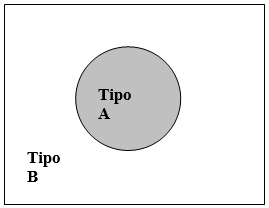

Resuelva este problema utilizando dos clases de redes neuronales diferentes. En cada caso:



1.   Describa cómo se escogieron los ejemplos de entrenamiento
2.   Describa el proceso de entrenamiento
3.   Muestre los resultados obtenidos

Compare los resultados obtenidos usando los dos enfoques.

In [0]:
'''
Fuentes:
- https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/
- 

'''

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from math import sqrt
import pandas as pd
import math
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

Se generaon 1500 puntos. Se escogio un punto en la coordenada (19,21) y se calculó la distancia euclidiana de todos los puntos con respecto a este con el objetivo de encontrar cuales son aquellos que estaba cerca a él, por lo tanto, todo punto aque que estuviera a una distancia menor a 2.73 (valor escogido arbitrariamente), pertenecian a una clase llamada A y todos los que no, a la Clase B.

Una vez ya se habián hecho las separaciones de clases, se generó la imagen vista a continuación.

In [0]:
def Distancia_Euclidiana(px1,py1,px2,py2):
    return sqrt((px2-px1)**2+(py2-py1)**2)

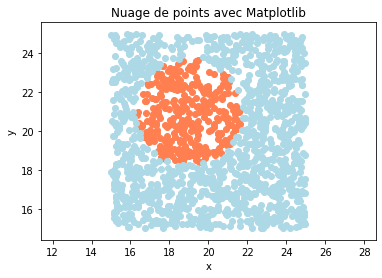

In [0]:
N = 1500
x = 15 + 10 * np.random.rand(N)
y = 15 + 10 * np.random.rand(N)

xy = list(zip(x,y))
claseA = list()
claseB = list()
for t in xy:
    dist = Distancia_Euclidiana(19,21,t[0],t[1])
    if dist < math.e:
        claseA.append((t[0],t[1]))
    else:
        claseB.append((t[0],t[1]))
        
Ax, Ay = zip(*claseA)
Bx, By = zip(*claseB)

plt.scatter(Ax, Ay, c='coral')
plt.scatter(Bx, By, c='lightblue')

plt.title('Nuage de points avec Matplotlib')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
A = dict({
    'x':Ax,
    'y':Ay,
    'C':1.0
})

B = dict({
    'x':Bx,
    'y':By,
    'C':0.0
})
dfA = pd.DataFrame(A)
dfB = pd.DataFrame(B)
dataset = dfA.append(dfB, sort=False)

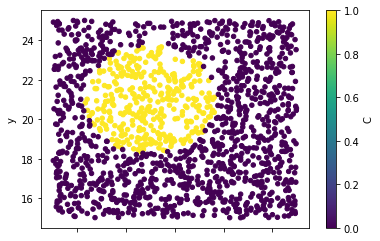

In [0]:
features = dataset.iloc[:,0:2]
clases = dataset['C']

X_train, X_test, y_train, y_test = train_test_split(features, clases, test_size=0.25, random_state=42)
dataset.plot.scatter(x='x',y='y',c='C', colormap='viridis')

### Primer Clasificador

Usando la libreria Scikit Learn se creó un perceptro multicapa con 3 capas ocultas de 16, 8 y 4 nodos respectivamente. Se usó 'ReLu' como activación de todas las capas. Solver = 'Adam'

In [0]:
clf = MLPClassifier(activation='relu',solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(16,8,4), random_state=1)

clf.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 8, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[258  36]
 [ 38  43]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       294
         1.0       0.54      0.53      0.54        81

    accuracy                           0.80       375
   macro avg       0.71      0.70      0.71       375
weighted avg       0.80      0.80      0.80       375



### Segundo clasificador

Usando la libreria Keras Learn se creó un perceptro multicapa con 4 capas ocultas de 32, 32, 16, y 8 nodos respectivamente. Se usó 'ReLu' como activación de todas las capas. Solver = 'Adam'. En la ultima capa, la de decisión, se uso Sigmoide sobre un solo nodo de salida.

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(16, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(8, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train,
          y_train,
          epochs=50,
          validation_split=0.1,
          batch_size=10)

Train on 1012 samples, validate on 113 samples
Epoch 1/50
1012/1012 [==============================] - 1s 1ms/step - loss: 0.7317 - acc: 0.7540 - val_loss: 0.4913 - val_acc: 0.7611
Epoch 2/50
1012/1012 [==============================] - 1s 581us/step - loss: 0.4557 - acc: 0.7579 - val_loss: 0.6673 - val_acc: 0.7611
Epoch 3/50
1012/1012 [==============================] - 1s 568us/step - loss: 0.4546 - acc: 0.7658 - val_loss: 0.4443 - val_acc: 0.7611
Epoch 4/50
1012/1012 [==============================] - 1s 600us/step - loss: 0.4347 - acc: 0.7599 - val_loss: 0.4326 - val_acc: 0.7611
Epoch 5/50
1012/1012 [==============================] - 1s 602us/step - loss: 0.4459 - acc: 0.7698 - val_loss: 0.4509 - val_acc: 0.7611
Epoch 6/50
1012/1012 [==============================] - 1s 612us/step - loss: 0.4519 - acc: 0.7589 - val_loss: 0.5783 - val_acc: 0.7611
Epoch 7/50
1012/1012 [==============================] - 1s 636us/step - loss: 0.4278 - acc: 0.7688 - val_loss: 0.4959 - val_acc: 0.7611
Epo

In [0]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1125/1125 [==============================] - 0s 59us/step
Accuracy: 78.93


### Comparacion de clasificadores

In [0]:
predictions_red1 = clf.predict(np.array([[19, 21],
                                         [20,20],
                                         [19.5,22],
                                         [24,17]]))

predictions_red2 = model.predict_classes(np.array([[19, 21],
                                                   [20,20],
                                                   [19.5,22],
                                                   [24,17]]))

In [0]:
print(predictions_red1)
print(predictions_red2)

[1. 0. 1. 0.]
[[1]
 [0]
 [1]
 [0]]


Las precisiones de los clasificadores son:
Clasificador 1: 80%
Clasificador 2: 78.93%

Sobre 4 predicciones se obtuvo

*   Clasificador 1: [1. 0. 1. 0.]
*   Clasificador 2: [1. 0. 1. 0.]
*   Esperado: [1. 1. 1. 0.]

Se observa que ambos fallan en solo 1 valor. 



# Problema 7 (a)


La matriz de memoria se calcula con la suma de los productos externos entre cada key y respuesta

\begin{equation}
M = \sum y_{k}x_{k}^{T}
\end{equation}

In [0]:
# Matriz de keys

X = np.array([[1,0,0],[0,1,0],[0,0,1],[0,0,0]])

print('Las keys son dadas como las columnas de la primera matriz X:')

X

Las keys son dadas como las columnas de la primera matriz X:


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [0]:
# Matriz de respuestas 
Y = np.array([[5,-2,-2],[1,1,4],[0,6,3]])

print('las respuestas son almacenadas en las columnas de la matriz Y:')

Y

las respuestas son almacenadas en las columnas de la matriz Y:


array([[ 5, -2, -2],
       [ 1,  1,  4],
       [ 0,  6,  3]])

In [0]:
# Matriz de memoria asociativa

M = np.zeros((3,4))
for i in range(3):
  M += np.outer(Y[:,i],X[:,i])

print('La matriz memoria de la red asociativa M es:')
print(M)



La matriz memoria de la red asociativa M es:
[[ 5. -2. -2.  0.]
 [ 1.  1.  4.  0.]
 [ 0.  6.  3.  0.]]


# Problema 7 (b)

La memoria asocia perfectamente porque los vectores keys son claramente ortonormales.

In [0]:
# Matriz D de el producto entre la matriz de llaves X y su traspuesto

D = np.dot(X.T,X)

print('En la matriz D se puede observar que los vectores de llaves son ortonormales:')
print(D)

En la matriz D se puede observar que los vectores de llaves son ortonormales:
[[1 0 0]
 [0 1 0]
 [0 0 1]]


# Problema 7 (c)

Ahora calculamos la respuesta y de la memoria con una version ruidosa del patron llave x_1

In [0]:
# x : version ruidosa del patron llave
x = np.array([[0.8, -0.15, 0.15, -0.20]]).T

# y : respuesta de la memoria al estimulo en una version ruidosa
y = np.dot(M,x)

print('La respuesta y a la version ruidosa x del patron llave x1 es:')
print(y)



La respuesta y a la version ruidosa x del patron llave x1 es:
[[ 4.  ]
 [ 1.25]
 [-0.45]]


# Problema 7(d)

 Ahora comprobamos que la respuesta y esta mas cerca al patron almacenado por y1 en un sentido euclideano en comparacion con las otras respuestas

In [0]:
# Distancia euclideana de y frente a las respuestas de la memoria Y

for i in range(3):
  print('La distancia euclidiana al patron y{} es:'.format(i+1))
  print(np.linalg.norm(y.T-Y[:,i]))
  
print('-------------------------------------------------')
print('la distancia Euclideana mas corta es entre y y y1')

La distancia euclidiana al patron y1 es:
1.1247221879201992
La distancia euclidiana al patron y2 es:
8.81277481840992
La distancia euclidiana al patron y3 es:
7.447482796220479
-------------------------------------------------
la distancia Euclideana mas corta es entre y y y1


# Problema 8 (a)

In [0]:
# Creamos la matriz de llaves donde cada llave columna es una llave

X = 0.25*np.array([[-2, -3, math.sqrt(3)], [2, -2, -math.sqrt(8)], [3, -1, math.sqrt(6)]]).T
print('La matriz de llaves X donde cada columna es una llave:')
print(X)

La matriz de llaves X donde cada columna es una llave:
[[-0.5         0.5         0.75      ]
 [-0.75       -0.5        -0.25      ]
 [ 0.4330127  -0.70710678  0.61237244]]


In [0]:
# Ahora buscamos el angulo entre pares de vectores

def angle(v1, v2):
  return (360/(2*math.pi))*math.acos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

for i in range(3):
  for j in range(i+1,3):
    print('El angulo en grados entre la llave x{} y la llave x{} es:'.format(i+1,j+1))
    print(angle(X[:,i],X[:,j]))
    
print('--------------------------------------------')
print('Los vectores estan cerca de la ortogonalidad(cerca a 90)')

El angulo en grados entre la llave x1 y la llave x2 es:
100.43886125978185
El angulo en grados entre la llave x1 y la llave x3 es:
85.54563512995553
El angulo en grados entre la llave x2 y la llave x3 es:
86.15903428374187
--------------------------------------------
Los vectores estan cerca de la ortogonalidad(cerca a 90)


# Problema 8(b)

Ahora se calcula la matriz de memoria de la red usando la regla de Hebb es decir se calculan los productos externos entre cada muestra y la respuesta y luego se suman, en este caso como es autoasociativo yk = xk

\begin{equation}
M = \sum x_{k}x_{k}^{T}
\end{equation}

In [0]:
# Matriz de memoria

M = np.zeros((3,3))
for i in range(3):
  M += np.outer(X[:,i].T,X[:,i].T)

print('La matriz memoria de la red autoasociativa M es:')
print(M)



La matriz memoria de la red autoasociativa M es:
[[ 1.0625     -0.0625     -0.11078041]
 [-0.0625      0.875      -0.12429924]
 [-0.11078041 -0.12429924  1.0625    ]]


La red es cercana a una autoasociacion perfecta porque los vectores de llaves son casi ortonormales.


In [0]:
# Matriz O de la matriz transpuesta de X por la matriz X , para comparar con la identidad

O = np.dot(X.T, X)
I = np.eye(3)
Diff = O - I

print('La matriz O de la traspuesta de las llaves (X.T) por la matriz de las llaves X')
print(O)
print('La matriz Diff de la diferencia entre O y la identidad I que relaciona unas llaves ortogonales')
print(Diff)

La matriz O de la traspuesta de las llaves (X.T) por la matriz de las llaves X
[[ 1.         -0.18118622  0.07766504]
 [-0.18118622  1.          0.0669873 ]
 [ 0.07766504  0.0669873   1.        ]]
La matriz Diff de la diferencia entre O y la identidad I que relaciona unas llaves ortogonales
[[ 0.00000000e+00 -1.81186218e-01  7.76650429e-02]
 [-1.81186218e-01  0.00000000e+00  6.69872981e-02]
 [ 7.76650429e-02  6.69872981e-02 -1.11022302e-16]]


# Problema 8(c)

In [0]:
# e es el estimulo aplicado

e = np.array([[0, -3, math.sqrt(3)]]).T

# y_e es la respuesta al estimulo aplicado

y_e = np.dot(M, e)

print('El estimulo aplicado es:')
print(e)
print('La respuesta al estimulo aplicado es:')
print(y_e)


El estimulo aplicado es:
[[ 0.        ]
 [-3.        ]
 [ 1.73205081]]
La respuesta al estimulo aplicado es:
[[-0.00437731]
 [-2.84029261]
 [ 2.21320172]]


#Problema 9 (a)

Calculamos la matriz de pesos sinapticos con la formula:
\begin{equation}
W= \frac{1}{N}\sum x_{k}x_{k}^{T} - I
\end{equation}

Donde N son el numero de memorias

In [0]:
# Creamos la matriz de memorias fundamentales donde cada llave columna es una llave

X = np.array([[1, 1, 1, 1, 1], [1, -1, -1, 1, -1], [-1, 1, -1, 1, 1]]).T
print('La matriz de memorias fundamentales X donde cada columna es memoria fundamental es:')
print(X)

La matriz de memorias fundamentales X donde cada columna es memoria fundamental es:
[[ 1  1 -1]
 [ 1 -1  1]
 [ 1 -1 -1]
 [ 1  1  1]
 [ 1 -1  1]]


In [0]:
# Creamos la matriz W de pesos sinapticos de forma similar a la memorias de puntos 7 y 8

W = np.zeros((5,5))
for i in range(3):
  W += np.outer(X[:,i].T,X[:,i].T)

W -= 3*np.eye(5)
W = W/5


print('La matriz W de pesos sinapticos es:')
print(W)


La matriz W de pesos sinapticos es:
[[ 0.  -0.2  0.2  0.2 -0.2]
 [-0.2  0.   0.2  0.2  0.6]
 [ 0.2  0.2  0.  -0.2  0.2]
 [ 0.2  0.2 -0.2  0.   0.2]
 [-0.2  0.6  0.2  0.2  0. ]]


# Problema 9(b)

# Problema 9 (c)

Si consideramos la version ruidosa y asumimos sincronia: La red saltara alternadamente entre la version ruidosa x_r0 = [1, -1, 1, 1, 1] y  x_r1 = [1, 1, 1, 1, -1]

In [0]:
# Version ruidosa x_r0 de la memoria x_1

x_r0 = np.array([1, -1, 1, 1, 1])

# discriminacion version ruidosa y_r0

y_r0 = np.sign(np.dot(W, x_ruidosa1))

# resultado primera iteracion

x_r1 = np.array([1, 1, 1, 1, -1])

# discriminacion version ruidosa 2

y_r1 = np.sign(np.dot(W, x_r1))

print('La version ruidosa x_r0 es:')
print('x_r0 =', x_r0)
print('Los elementos 2 y 5 cambian de polaridad')
print('y_r0 =', y_r0)
print('La red va al estado x_r1 asumiendo sincronia cambiando la polaridad de los elementos 2 y 5 de x_r0')
print('x_r1 =', x_r1)
print('la siguiente discriminacion sobre x_r1 es y_r1')
print('y_r1 =', y_r1)
print('De nuevo los elementos 2 y 5 cambian de polaridad ')



La version ruidosa x_r0 es:
x_r0 = [ 1 -1  1  1  1]
Los elementos 2 y 5 cambian de polaridad
y_r0 = [ 1.  1.  0.  0. -1.]
La red va al estado x_r1 asumiendo sincronia cambiando la polaridad de los elementos 2 y 5 de x_r0
x_r1 = [ 1  1  1  1 -1]
la siguiente discriminacion sobre x_r1 es y_r1
y_r1 = [ 1. -1.  0.  0.  1.]
De nuevo los elementos 2 y 5 cambian de polaridad 


In [0]:
#

# Problema 9(d)

Ahora se calcula la matriz de memoria de la red usando la regla de Hebb es decir se calculan los productos externos entre cada muestra y la respuesta y luego se suman, en este caso como es autoasociativo yk = xk

\begin{equation}
M = \sum x_{k}x_{k}^{T}
\end{equation}

In [0]:
# Primero se normalizan las memorias fundamentales

# X_norm 

X_norm = (1/math.sqrt(5))*X

# Matriz de memoria

M = np.zeros((5,5))
for i in range(3):
  M += np.outer(X_norm[:,i].T,X_norm[:,i].T)
  
print('La matriz de las memorias normalizadas X_norm:')
print(X_norm)
print('La matriz memoria de la red autoasociativa M es:')
print(M)



La matriz de las memorias normalizadas X_norm:
[[ 0.4472136  0.4472136 -0.4472136]
 [ 0.4472136 -0.4472136  0.4472136]
 [ 0.4472136 -0.4472136 -0.4472136]
 [ 0.4472136  0.4472136  0.4472136]
 [ 0.4472136 -0.4472136  0.4472136]]
La matriz memoria de la red autoasociativa M es:
[[ 0.6 -0.2  0.2  0.2 -0.2]
 [-0.2  0.6  0.2  0.2  0.6]
 [ 0.2  0.2  0.6 -0.2  0.2]
 [ 0.2  0.2 -0.2  0.6  0.2]
 [-0.2  0.6  0.2  0.2  0.6]]


# Problema 9(e)

La red no es tan cercana a una autoasociacion perfecta porque los vectores de llaves no son ortonormales


In [0]:
# Matriz O de la matriz transpuesta de X por la matriz X , para comparar con la identidad

O = np.dot(X_norm.T, X_norm)
I = np.eye(3)
Diff = O - I

print('La matriz O de la traspuesta de las llaves (X.T) por la matriz de las llaves X')
print(O)
print('La matriz Diff de la diferencia entre O y la identidad I que relaciona unas llaves ortogonales')
print(Diff)

La matriz O de la traspuesta de las llaves (X.T) por la matriz de las llaves X
[[ 1.  -0.2  0.2]
 [-0.2  1.  -0.2]
 [ 0.2 -0.2  1. ]]
La matriz Diff de la diferencia entre O y la identidad I que relaciona unas llaves ortogonales
[[-1.11022302e-16 -2.00000000e-01  2.00000000e-01]
 [-2.00000000e-01 -1.11022302e-16 -2.00000000e-01]
 [ 2.00000000e-01 -2.00000000e-01 -1.11022302e-16]]


# Problema 9(f)

Miramos las actualizaciones de la red cuando se hace de forma sincronica. Escribimos las memorias fundamentales en las primeras tres filas, y sus negativos (para el punto 10) en las siguientes tres filas

In [0]:
# Creamos la matriz de estados iniciales posibles, en total son 2^5 = 32 estados posibles iniciales

A_0 = np.array([[1,1,1,1,1],[1,-1,-1,1,-1],[-1,1,-1,1,1],
                [-1,-1,-1,-1,-1],[-1,1,1,-1,1],[1,-1,1,-1,-1],
                [-1,-1,-1,-1,1],[-1,-1,-1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,-1,-1], 
                [1,-1,-1,-1,-1],[-1,-1,-1,1,1],[-1,-1,1,-1,1],[-1,1,-1,-1,1],
                [1,-1,-1,-1,1],[-1,-1,1,1,-1],[-1,1,-1,1,-1],[-1,1,1,-1,-1],
                [1,1,-1,-1,-1],[-1,-1,1,1,1],[1,-1,-1,1,1],[1,-1,1,-1,1],
                [1,1,-1,-1,1],[-1,1,1,1,-1],[1,-1,1,1,-1],[1,1,-1,1,-1], 
                [1,1,1,-1,-1],[-1,1,1,1,1],[1,-1,1,1,1],[1,1,-1,1,1],
                [1,1,1,-1,1],[1,1,1,1,-1]])
print('La matriz de estados posibles es:')
print(A_0)

La matriz de estados posibles es:
[[ 1  1  1  1  1]
 [ 1 -1 -1  1 -1]
 [-1  1 -1  1  1]
 [-1 -1 -1 -1 -1]
 [-1  1  1 -1  1]
 [ 1 -1  1 -1 -1]
 [-1 -1 -1 -1  1]
 [-1 -1 -1  1 -1]
 [-1 -1  1 -1 -1]
 [-1  1 -1 -1 -1]
 [ 1 -1 -1 -1 -1]
 [-1 -1 -1  1  1]
 [-1 -1  1 -1  1]
 [-1  1 -1 -1  1]
 [ 1 -1 -1 -1  1]
 [-1 -1  1  1 -1]
 [-1  1 -1  1 -1]
 [-1  1  1 -1 -1]
 [ 1  1 -1 -1 -1]
 [-1 -1  1  1  1]
 [ 1 -1 -1  1  1]
 [ 1 -1  1 -1  1]
 [ 1  1 -1 -1  1]
 [-1  1  1  1 -1]
 [ 1 -1  1  1 -1]
 [ 1  1 -1  1 -1]
 [ 1  1  1 -1 -1]
 [-1  1  1  1  1]
 [ 1 -1  1  1  1]
 [ 1  1 -1  1  1]
 [ 1  1  1 -1  1]
 [ 1  1  1  1 -1]]


Creamos la funcion de prediccion pred() de forma sincronica, por cada paso

In [0]:
def pred(A_i):
  A_f = np.sign(np.dot(W, A_i.T).T)
  for i in range(A_f.shape[0]):
    for j in range(A_f.shape[1]):
      if A_f[i, j] == 0:
        A_f[i,j] = A_i[i,j]
  return A_f

Para investigar los posibles resultados de la red, hacemos 4 iteraciones y miramos los valores  unicos a los que convergen todas las posibilidades

In [0]:
# prediccion de todas las posibilidades despues de la 4ta iteracion 
A_4 = pred(pred(pred(pred(A_0))))

# valores unicos de la 4ta iteracion
U_4 = np.unique(A_4, axis=0)
print('Despues de 4 iteraciones las posibilidades unicas de la red resultan a: ')
print(U_4)
print('Hay ', U_4.shape[0], 'valores posibles unicos')

Despues de 4 iteraciones las posibilidades unicas de la red resultan a: 
[[-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1.  1. -1.  1.]
 [-1. -1.  1.  1. -1.]
 [-1.  1. -1. -1. -1.]
 [-1.  1. -1.  1. -1.]
 [-1.  1. -1.  1.  1.]
 [-1.  1.  1. -1. -1.]
 [-1.  1.  1. -1.  1.]
 [-1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1. -1.]
 [ 1. -1. -1.  1. -1.]
 [ 1. -1. -1.  1.  1.]
 [ 1. -1.  1. -1. -1.]
 [ 1. -1.  1. -1.  1.]
 [ 1. -1.  1.  1.  1.]
 [ 1.  1. -1. -1.  1.]
 [ 1.  1. -1.  1. -1.]
 [ 1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1. -1.]
 [ 1.  1.  1.  1.  1.]]
Hay  22 valores posibles unicos


Ahora comparamos los valores en la prediccion en la iteracion 4 y la prediccion en la iteracion 5 para hallar los estados estables
Se observa que las memorias fundamentales (primeras tres filas) son estables y que otros estados iniciales tambien convergen, algunos estados iniciales parecen exhibir un ciclo limite

In [0]:
# Prediccion 5ta iteracion
A_5 = pred(A_4)

print('La diferencia entre la iteracion 4 y la 5ta es')
print(A_5 - A_4)

La diferencia entre la iteracion 4 y la 5ta es
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0. -2.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -2.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0. -2.]
 [ 0.  2.  0.  0. -2.]
 [ 0.  0.  0.  0.  0.]
 [-2. -2.  2.  2. -2.]
 [ 2.  2. -2. -2.  2.]
 [ 0. -2.  0.  0.  2.]
 [ 0. -2.  0.  0.  2.]
 [-2. -2.  2.  2. -2.]
 [ 2.  2. -2. -2.  2.]
 [ 0.  2.  0.  0. -2.]
 [ 0.  2.  0.  0. -2.]
 [-2. -2.  2.  2. -2.]
 [ 2.  2. -2. -2.  2.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -2.  0.  0.  2.]
 [ 0. -2.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0. -2.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -2.  0.  0.  2.]]


# Problema 10

Considerando las nuevas memorias fundamentales obtenemos la misma matriz de pesos sinapticos que la red anterior del problema 9(a) por lo tanto, estas tambien son memorias fundamentales de la red del problema 9(a). 

Ademas, 

Los patrones del problema 10 estan formados por los negativos del problema 9.

Igualmente en el punto 9(f) se observa que la matriz ultima que los valores del 3 al 6 (indices donde guardamos las memorias del problema 10) son estables entre la iteracion 4 y la iteracion 5, es decir que estos nuevas memorias fundamentales tambien son estables.

In [0]:
# Creamos la matriz de memorias fundamentales donde cada memoria es una columna de la matriz

X = np.array([[-1, -1, -1, -1, -1], [-1, 1, 1, -1, 1], [1, -1, 1, -1, -1]]).T

# Creamos la matriz W de pesos sinapticos de forma similar a la memorias de punto 9

W = np.zeros((5,5))
for i in range(3):
  W += np.outer(X[:,i].T,X[:,i].T)

W -= 3*np.eye(5)
W = W/5



print('La matriz de memorias fundamentales X donde cada columna es memoria fundamental es:')
print(X)

print('La matriz W de pesos sinapticos es:')
print(W)

La matriz de memorias fundamentales X donde cada columna es memoria fundamental es:
[[-1 -1  1]
 [-1  1 -1]
 [-1  1  1]
 [-1 -1 -1]
 [-1  1 -1]]
La matriz W de pesos sinapticos es:
[[ 0.  -0.2  0.2  0.2 -0.2]
 [-0.2  0.   0.2  0.2  0.6]
 [ 0.2  0.2  0.  -0.2  0.2]
 [ 0.2  0.2 -0.2  0.   0.2]
 [-0.2  0.6  0.2  0.2  0. ]]


In [0]:
# Actualizacion sincronica de las matrices fundamentales del problema 10 

X_1 = pred(X.T).T

print('En una primera iteracion sincronica tenemos que X_1 = X_0')
print('Por lo tanto son estados estables')
print('X_1=')
print(X_1)

En una primera iteracion sincronica tenemos que X_1 = X_0
Por lo tanto son estados estables
X_1=
[[-1. -1.  1.]
 [-1.  1. -1.]
 [-1.  1.  1.]
 [-1. -1. -1.]
 [-1.  1. -1.]]


#Problema 11(a)

En el codigo se estudia la evolucion de los estados posibles de la red, se observa que los estados x_2, x_4 son estables, los estados x_1 y x_3 oscilan entre los estados [1, 1] y [-1, -1]

In [0]:
# Matriz de pesos sinapticos W

W = np.array([[0, -1],[-1, 0]])

# Matriz de estados posibles de la red X

X_0 = np.array([[1, 1], [-1, 1], [-1, -1], [1, -1]]).T

print('La matriz de pesos sinapticos es:')
print('W =')
print(W)

print('La matriz de estados posibles de la red es:')
print('X_0 = [x_1 x_2 x_3 x_4] =')
print(X)


La matriz de pesos sinapticos es:
W =
[[ 0 -1]
 [-1  0]]
La matriz de estados posibles de la red es:
X_0 = [x_1 x_2 x_3 x_4] =
[[ 1 -1 -1  1]
 [ 1  1 -1 -1]]


In [0]:
# Los cuatro estados evolucionan en la primera iteracion a X_1

X_1 = np.dot(W, X_0)

# Estados posibles en la segunda iteracion X_2

X_2 = np.dot(W, X_1)

print('En la primera iteracion los estados evolucionan a los estados')
print('X_1 =')
print(X_1)

print('En la segunda iteracion los estados evolucionan a los estados')
print('X_2 =')
print(X_2)


En la primera iteracion los estados evolucionan a los estados
X_1 =
[[-1 -1  1  1]
 [-1  1  1 -1]]
En la segunda iteracion los estados evolucionan a los estados
X_2 =
[[ 1 -1 -1  1]
 [ 1  1 -1 -1]]


# Problema 11(b)

En el codigo del problema 11(a) se observa que los estados x_1, x_3 intercalan los estados entre [1, 1] y [-1, -1] por lo tanto la longitud del ciclo es 2 

# Problema 12 (a)

En el codigo siguiente se muestra la tabla de analisis y la grafica de dispersion de los datos.

In [0]:
# Creamos la tabla de valores del problema

tabla_Koh = {'caso': [1,2,3,4,5,6,7,8,9,10,11],
             'X': [1,2,3,10,22,21,23,44,45,48,49],
             'Y': [8,4,8,23,25,25,26,9,5,8,6]}
tabla_Koh = pd.DataFrame(tabla_Koh)
tabla_Koh

,caso,X,Y
0,1,1,8
1,2,2,4
2,3,3,8
3,4,10,23
4,5,22,25
5,6,21,25
6,7,23,26
7,8,44,9
8,9,45,5
9,10,48,8


Text(0.5, 1.0, 'Grafica de dispersion de X y Y')

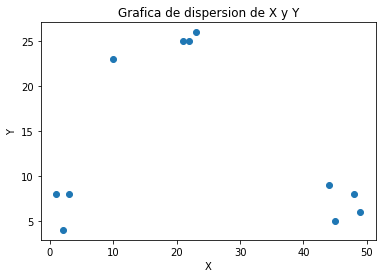

In [0]:
# Creamos la grafica de dispersion de los datos de X y Y 

plt.scatter(tabla_Koh['X'], tabla_Koh['Y'])
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Grafica de dispersion de X y Y')

# Problema 12(b)

En la grafica de dispersion de X y Y se pueden observar tres grupos diferenciados. Uno de los casos {1,2,3} otro de los casos {4,5,6,7}, y por ultimo los casos {8,9,10,11}, aunque el caso 4 se aleja un poco de su grupo.

#Problema 12(c)


A continuacion implementamos el codigo para hacer mapas de Kohonen, implementamos un codigo propio pero el siguiente git nos sirvio de guia en especial para la visualizacion 
https://github.com/abhinavralhan/kohonen-maps/blob/master/som-random.ipynb


Inicializamos los valores de la tabla para entrenar una red de (7, 7)



In [0]:
# Escribimos los puntos en una matriz X

X = tabla_Koh[['X','Y']].values.T
X_lenght = X.shape[1]

# num_iter: numero de iteraciones
# r_0 : taza inicial de aprendizaje
# size_set: la longitud del lado de la red cuadriculada

num_iter = 1000
r_0 = 0.1
size_net = 7

# Inicializamos los pesos de la red

W_n = np.random.uniform(low=0, high=40, size=(size_net, size_net , 2))

# Inicializamos el radio inicial y la constante de tiempo

init_radius = W_n.shape[0]
time_const = num_iter/np.log(init_radius)

Definimos funciones de ayuda para crear los mapas de Kohonen


In [0]:
# Funciones de ayuda para crear los mapas

# funcion de taza de aprendizaje adaptativa

def r(n):
  return r_0*math.exp(-n/num_iter)

# vecindad gausiana adaptativa

def g(n):
  return init_radius*math.exp(-n/time_const)

# funcion de vecindad
def h(w_i, w_j, n):
  return np.exp(-(np.linalg.norm(w_i-w_j)/(math.sqrt(2)*g(n)))**2)

# funcion para determinar neurona ganadora
# Wp es la red de (size_net,size_net,2)
# xp es el dato de entrenamiento

def winner_neuron(Wp, xp):
  Dist = Wp - xp
  lp = Wp.shape[0]
  Ec_dist = np.zeros((lp,lp))
  for i in range(lp):
    for j in range(lp):
       Ec_dist[i,j] = np.linalg.norm(Wp[i, j , :]-xp)
  min_index = np.array(np.where(Ec_dist == Ec_dist.min())).flatten()
  return Wp[min_index[0], min_index[1] ,:], min_index


Entrenamos la red en la siguiente parte, imprimimos los pesos que aprende la red


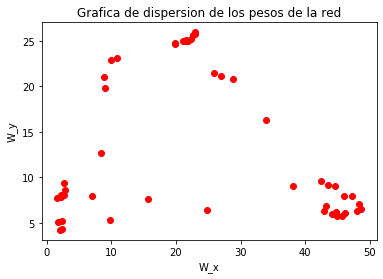

In [0]:
# Ahora corremos el mapa de Kohonen

for n in range(num_iter):
  
  x_random = X[:,np.random.randint(X_lenght)]
  win_neuron_n, win_index_n = winner_neuron(W_n, x_random)
  for x in range(len_Wn):
    for y in range(len_Wn):
      # Distancia Euclideana entre la neurona ganadora y la que esta en el punto (x,y)
      dist = np.linalg.norm(win_index_n - np.array([x,y]))
      # Si la distancia ecuclidiana en la red es menor que el valor g se actualiza el peso
      if dist < g(n):
        W_n[x, y ,:] = W_n[x, y ,:] + r(n)*h(np.array([x, y]), win_index_n, n)*(x_random-W_n[x, y,:])

plt.scatter(W_n[:,:,0].flatten(), W_n[:,:,1].flatten(), color='red')
plt.xlabel("W_x")
plt.ylabel("W_y")
plt.title('Grafica de dispersion de los pesos de la red')
plt.show()


Dibujamos el mapa de Kohonen y se encuentran tres agrupaciones principales de la red 7x7


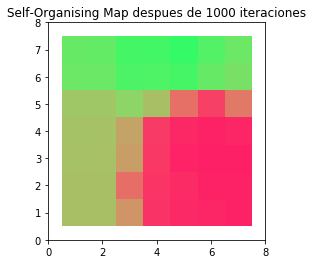

In [0]:
# Ahora dibujamos el mapa de Kohonen

fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, W_n.shape[0]+1))
ax.set_ylim((0, W_n.shape[1]+1))
ax.set_title('Self-Organising Map despues de %d iteraciones' % num_iter)

# plot
for x in range(1, W_n.shape[0] + 1):
    for y in range(1, W_n.shape[1] + 1):
        norm_Wn = W_n[x-1,y-1,:]/(np.linalg.norm(W_n[x-1,y-1,:]))
        list_n = list(norm_Wn)
        list_n.append(0.4)
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                     facecolor=list_n,
                     edgecolor='none'))


# Problema 13

Creamos 150 puntos dentro del triangulo



<function matplotlib.pyplot.show>

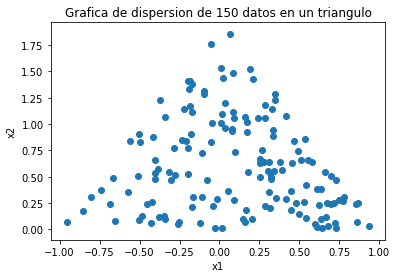

In [0]:
# Inicializamos la matriz de puntos en 0, 0
X = np.zeros((2, 150))
X_lenght = X.shape[1]


# Vamos agregando puntos aletorimente entre (-1, 1) en x y (0,2) en y que cumplan 
# que esten dentro de la frontera del triangulo y = -2x + 2, y = 2x + 2

i = 0
while i < 150:
  x_i = random.uniform(-1, 1)
  y_i = random.uniform(0, 2)
  if (-2*x_i - y_i + 2 > 0) and (2*x_i - y_i + 2 > 0 ):
    X[:, i] = [x_i, y_i]
    i += 1

plt.scatter(X[0,:],X[1,:])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Grafica de dispersion de 150 datos en un triangulo')
plt.show


haciendo uso de las funciones de los mapas de Kohonen implementamos un mapa en una dimension es decir que las neuronas solo se comunican con las dos neuronas mas cercanas y las dos siguientes mas cercanas en una linea

In [0]:
# num_iter: numero de iteraciones
# r_0 : taza inicial de aprendizaje
# size_set: la longitud del lado de la red cuadriculada

num_iter = 50000
r_0 = 0.1
size_net = 65

# Inicializamos los pesos de la red

W_0 = np.random.random((65,2))*0.05
#W_0[:,0] -= 0.5
lenght_W = W_0.shape[0]


# Inicializamos el radio inicial y la constante de tiempo

init_radius = 2.5
time_const = num_iter/np.log(init_radius)

Creamos las funciones de ayuda para implementar la red de Kohonen en una dimension, con respecto al punto 12 varia un poco la funcion de neurona ganadora, y la funcion de vecindad h por la topologia

In [0]:
# Funciones de ayuda para crear los SOM en una dimension

# funcion de taza de aprendizaje adaptativa

def r_1(n):
  return r_0*math.exp(-n/num_iter)

# vecindad gausiana adaptativa

def g_1(n):
  return init_radius*math.exp(-n/time_const)

# funcion de vecindad
def h_1(w_i, w_j, n):
  return np.exp(-(np.linalg.norm((w_i-w_j)%lenght_W)/(math.sqrt(2)*g_1(n)))**2)

# funcion para determinar neurona ganadora
# Wp es la red de (size_net,size_net,2)
# xp es el dato de entrenamiento

def winner_neuron_1(Wp, xp):
  lp = Wp.shape[0]
  Ec_dist = np.zeros((lp))
  for i in range(lp):
    Ec_dist[i] = np.linalg.norm(Wp[i,:]-xp)
  min_index = np.array(np.where(Ec_dist == Ec_dist.min())).flatten()
  return Wp[min_index[0],:], min_index

En esta parte creamos el mapa de Kohonen en una dimension e imprimimos el SOM para varias iteraciones hasta 50000

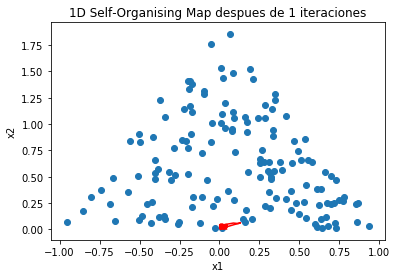

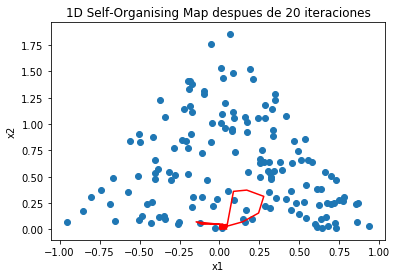

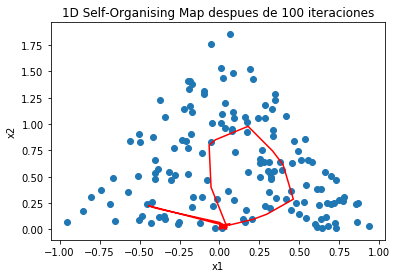

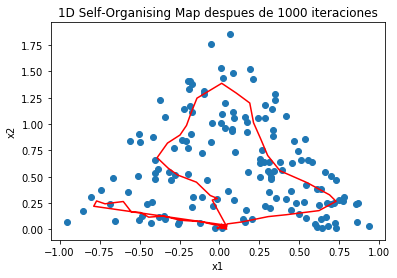

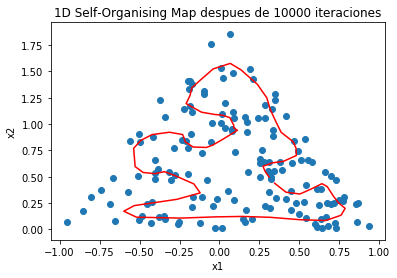

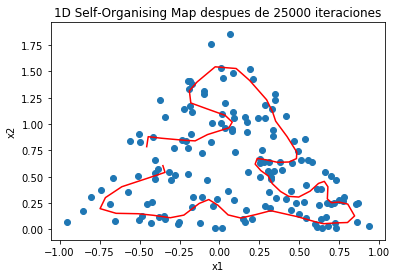

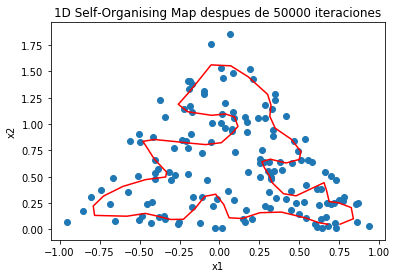

In [0]:
# Ahora corremos el mapa de Kohonen

#for iters in [0, 20, 100, 1000, 10000, 25000]:
W_n = W_0
for n in range(num_iter):
  # Se escoge un dato de entrenamiento random y se busca la neurona ganadora
  x_random = X[:,np.random.randint(X_lenght)]
  win_neuron_n, win_index_n = winner_neuron_1(W_n, x_random)
  # nearest guarda las 4 neuronas vecinas en una linea
  nearest = [(win_index_n-2)%lenght_W,(win_index_n-1)%lenght_W,win_index_n,
            (win_index_n + 1)%lenght_W, (win_index_n + 2)%lenght_W]
  for j in nearest:
    W_n[j,:] = W_n[j,:] + r_1(n)*h_1(np.array([j]), win_index_n, n)*(x_random-W_n[j,:])
  if n in [0, 19, 99, 999, 9999, 24999, 49999]:
    # Ahora dibujamos el mapa de Kohonen en una dimension conectando las neuronas vecinas
    plt.scatter(X[0,:],X[1,:])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('1D Self-Organising Map despues de %d iteraciones' % (n+1))
    plt.plot(W_n[:,0],W_n[:,1], color ='red')
    plt.show()

# Problema 14

Creamos las cuatro nubes gaussianas A, B, C, D de ocho dimensiones tienen varianza 1, y por lo tanto desviacion estandar tambien de 1, las dimensiones estan dadas por a1, ..a8 para A, b1,b2, ... b8 para B, etc.
Y cada nube tendra 50 datos

*   A esta centrada en (0,0, ..., O) <font color='blue'>azul</font>
*   B esta centrada en (4,0, ..., O) <font color='red'>roja</font>
*   C esta centrada en (4,4, ..., O) <font color='gold'>dorada</font>
*   D esta centrada en (0,4, ..., O) negra







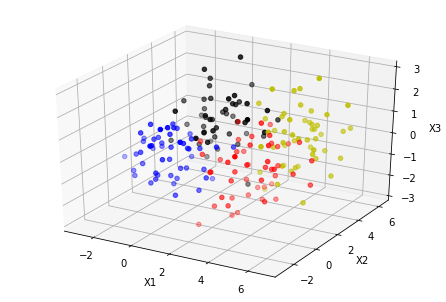

In [0]:
# Numero de datos totales
# cada nube tiene un cuarto de los datos
num_data = 200
num_cloud = int(num_data/4)

# Nube A
a1, a2, a3, a4, a5, a6, a7, a8 = np.random.multivariate_normal([0,0,0,0,0,0,0,0],np.eye(8), size= int(num_data/4)).T

# Nube B
b1, b2, b3, b4, b5, b6, b7, b8 = np.random.multivariate_normal([4,0,0,0,0,0,0,0], np.eye(8), size= int(num_data/4)).T

# Nube C
c1, c2, c3, c4, c5, c6, c7, c8 = np.random.multivariate_normal([4,4,0,0,0,0,0,0], np.eye(8), size= int(num_data/4)).T

# Nube D
d1, d2, d3, d4, d5, d6, d7, d8 = np.random.multivariate_normal([0,4,0,0,0,0,0,0], np.eye(8), size= int(num_data/4)).T

# Creamos la matriz de datos de entrada, con las 4 nubes, con un numero de num_data datos

X = np.zeros((8, num_data))
for i in range(8):
  X[i,0:num_cloud] = eval('a{}'.format(i+1))
  X[i,num_cloud:num_cloud*2] = eval('b{}'.format(i+1))
  X[i,num_cloud*2:num_cloud*3] = eval('c{}'.format(i+1))
  X[i,num_cloud*3:num_cloud*4] = eval('d{}'.format(i+1))

# Graficamos las cuatro nubes en las tres primeras coordenadas
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(a1, a2, a3, c = 'b')
ax.scatter(b1, b2, b3, c = 'r')
ax.scatter(c1, c2, c3, c = 'y')
ax.scatter(d1, d2, d3, c = 'k')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()


Ahora vamos a entrenar la red de Kohonen bidimensional con entrada de 8 dimensiones, el codigo es igual que el del punto 12, en este caso la red tiene size 10 porque es 10x10



In [0]:
# num_iter: numero de iteraciones
# r_0 : taza inicial de aprendizaje
# size_set: la longitud del lado de la red cuadriculada

num_iter = 10000
r_0 = 0.1
size_net = 10

# Inicializamos los pesos de la red

W_n = np.random.random((size_net, size_net , 8))*0.05

# Inicializamos el radio inicial y la constante de tiempo

init_radius = W_n.shape[0]
time_const = num_iter/np.log(init_radius)

A continuacion estan las funciones de ayuda para entrenar la red de Kohonen, son las mismas que en el problema 12

In [0]:
# Funciones de ayuda para crear los mapas

# funcion de taza de aprendizaje adaptativa

def r(n):
  return r_0*math.exp(-n/num_iter)

# vecindad gausiana adaptativa

def g(n):
  return init_radius*math.exp(-n/time_const)

# funcion de vecindad
def h(w_i, w_j, n):
  return np.exp(-(np.linalg.norm(w_i-w_j)/(math.sqrt(2)*g(n)))**2)

# funcion para determinar neurona ganadora
# Wp es la red de (size_net,size_net,8)
# xp es el dato de entrenamiento

def winner_neuron(Wp, xp):
  lp = Wp.shape[0]
  Ec_dist = np.zeros((lp,lp))
  for i in range(lp):
    for j in range(lp):
       Ec_dist[i,j] = np.linalg.norm(Wp[i, j , :]-xp)
  min_index = np.array(np.where(Ec_dist == Ec_dist.min())).flatten()
  return Wp[min_index[0], min_index[1] ,:], min_index

A continuacion entrenamos la red y graficamos los pesos que aprendio la red en las tres primeras dimensiones


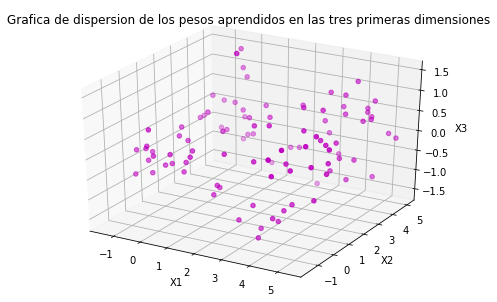

In [0]:
# Ahora corremos el mapa de Kohonen

for n in range(num_iter):
  
  x_random = X[:,np.random.randint(num_data)]
  win_neuron_n, win_index_n = winner_neuron(W_n, x_random)
  for x in range(W_n.shape[0]):
    for y in range(W_n.shape[0]):
      # Distancia Euclideana entre la neurona ganadora y la que esta en el punto (x,y)
      dist = np.linalg.norm(win_index_n - np.array([x,y]))
      # Si la distancia ecuclidiana en la red es menor que el valor g se actualiza el peso
      if dist < g(n):
        W_n[x, y ,:] = W_n[x, y ,:] + r(n)*h(np.array([x, y]), win_index_n, n)*(x_random-W_n[x, y,:])

# Ahora imprimimos los valores aprendidos por la red

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(W_n[:,:,0].flatten(), W_n[:,:,1].flatten(),W_n[:,:,2].flatten(), c = 'm')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Grafica de dispersion de los pesos aprendidos en las tres primeras dimensiones')
plt.show()


Ahora graficamos la red de Kohonen de la red 10x10 teniendo en cuenta que etiquetamos cada neurona de acuerdo a la clase mas reprentativa, donde los colores son asi:

*   Nube A o C1 <font color='blue'>azul</font>
*   Nube B o C2 <font color='red'>rojo</font>
*   Nube C o C3 <font color='gold'>dorada</font>
*   Nube D o C4 negro





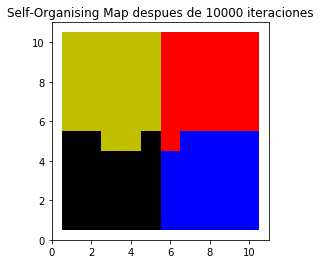

In [0]:
# Ahora graficamos el mapa de Kohonen etiquetando cada neurona con su clase mas representativa

fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, W_n.shape[0]+1))
ax.set_ylim((0, W_n.shape[1]+1))
ax.set_title('Self-Organising Map despues de %d iteraciones' % num_iter)

# plot
for x in range(1, W_n.shape[0] + 1):
    for y in range(1, W_n.shape[1] + 1):
        # norm_Wn = W_n[x-1,y-1,:]/(np.linalg.norm(W_n[x-1,y-1,:]))
        # list_n = list(norm_Wn)
        # list_n.append(0.4)
        if W_n[x-1,y-1,0] <= 2 and W_n[x-1,y-1,1] <= 2:
          ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                        facecolor='b',
                        edgecolor='none'))
        elif W_n[x-1,y-1,0] > 2 and W_n[x-1,y-1,1] <= 2:
          ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                        facecolor='r',
                        edgecolor='none'))
        elif W_n[x-1,y-1,0] > 2 and W_n[x-1,y-1,1] > 2:
          ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                        facecolor='y',
                        edgecolor='none'))
        elif W_n[x-1,y-1,0] <= 2 and W_n[x-1,y-1,1] > 2:
          ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                        facecolor='k',
                        edgecolor='none'))

In [0]:
one = np.random.normal()

(array([  9.,  43., 154., 361., 557., 458., 277., 114.,  20.,   7.]),
 array([-10.00752058,  -7.92282442,  -5.83812826,  -3.75343211,
         -1.66873595,   0.41596021,   2.50065637,   4.58535253,
          6.67004868,   8.75474484,  10.839441  ]),
 <a list of 10 Patch objects>)

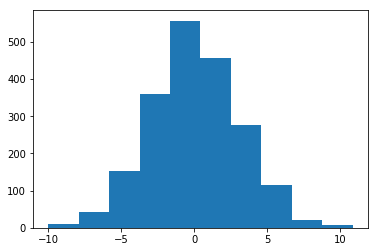

In [0]:
plt.hist(one)